# Cup classification with pre-extracted feature
* **Date** 11/28/2016
* **Author** [Haonan Chen](https://chaonan99.github.io/)
* **Student No.** 2013011449
* **Class** 32

## Highlight
* Multi classifier
* Select different number of features
* P-value based feature selection
* Model based feature selection
* PCA decomposition

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import *
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
def read_pickle(file_path):
    with open(file_path, "rb") as fin:
        return pickle.load(fin)
    return None
X_train_raw, y_train = read_pickle("train_forstu.pickle")
X_test_raw, y_test = read_pickle("valid_forstu.pickle")

In [43]:
classifier_names = ["Bayes", "LDA", "LSVM", "RBF SVM", "MLP"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    LinearSVC(C=0.025),
    SVC(gamma=0.001, C=100),
    MLPClassifier(alpha=1e-5, hidden_layer_sizes=256, random_state=1, max_iter=3000),
]
selectors = [
#     number of feature experiment
    SelectKBest(f_classif, k=256),  # Actually an empty selector
#     SelectKBest(f_classif, k=8),
#     SelectKBest(f_classif, k=7),
#     SelectKBest(f_classif, k=6),
#     SelectKBest(f_classif, k=5),
#     SelectKBest(f_classif, k=4),
#     SelectKBest(f_classif, k=3),
#     SelectKBest(f_classif, k=2),
#     SelectKBest(f_classif, k=1),
#     p-value experiment
#     SelectKBest(chi2, k=100),
#     SelectKBest(f_classif, k=100),
#     SelectKBest(mutual_info_classif, k=100),
#     RFE(LogisticRegression(), 3),
#     RFE(LinearSVC(C=0.005), 3),
#     RFE(LinearSVC(C=0.005, penalty="l1", dual=False), 3),
#     RFE(ExtraTreesClassifier(), 3),
    SelectFromModel(LogisticRegression()),
    SelectFromModel(LinearSVC(C=0.005)),
    SelectFromModel(LinearSVC(C=0.005, penalty="l1", dual=False)),
    SelectFromModel(ExtraTreesClassifier()),
]

def do_prediction(clf, X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    clf.fit(X_train, y_train)
    return accuracy_score(clf.predict(X_test), y_test)

def do_selection_and_prediction(sel, clf, X_train, X_test, y_train, y_test):
    sel.fit(X_train, y_train)
    return do_prediction(clf, sel.transform(X_train), sel.transform(X_test), y_train, y_test)

In [44]:
print("Training accuracy")
train_res = pd.DataFrame([["{0:.2f}%".format(do_selection_and_prediction(sel, clf, X_train_raw,
            X_train_raw, y_train, y_train)*100) for clf in classifiers] for sel in selectors],
            columns=classifier_names)
train_res

Training accuracy


,Bayes,LDA,LSVM,RBF SVM,MLP
0,73.85%,89.67%,94.96%,99.79%,99.79%
1,64.09%,78.37%,82.39%,97.16%,99.79%
2,66.54%,80.71%,85.93%,97.44%,99.68%
3,75.15%,89.18%,93.98%,99.79%,99.79%
4,71.54%,78.89%,84.28%,97.27%,99.68%


In [45]:
print("Test accuracy")
test_res = pd.DataFrame([["{0:.2f}%".format(do_selection_and_prediction(sel, clf, X_train_raw,
            X_test_raw, y_train, y_test)*100) for clf in classifiers] for sel in selectors],
            columns=classifier_names)
test_res

Test accuracy


,Bayes,LDA,LSVM,RBF SVM,MLP
0,58.78%,74.48%,76.46%,76.24%,81.55%
1,50.28%,65.86%,67.85%,64.97%,70.72%
2,52.71%,66.63%,68.95%,67.51%,70.39%
3,58.67%,73.48%,76.80%,76.24%,80.55%
4,54.70%,64.64%,64.64%,68.51%,74.70%


In [42]:
pca = PCA(n_components=200)
pca.fit(X_train_raw)
X_train = pca.transform(X_train_raw)
X_test = pca.transform(X_test_raw)
pca_res = pd.DataFrame([["{0:.2f}%".format(do_prediction(clf, X_train,
            X_train, y_train, y_train)*100) for clf in classifiers],
            ["{0:.2f}%".format(do_prediction(clf, X_train,
            X_test, y_train, y_test)*100) for clf in classifiers]], index=["train", "test"], columns=classifier_names)
# pca_res.to_latex("tmp.tex")
pca_res

,Bayes,LDA,LSVM,RBF SVM,MLP
train,64.02%,87.68%,92.61%,99.79%,99.79%
test,47.73%,72.38%,75.58%,73.37%,76.46%


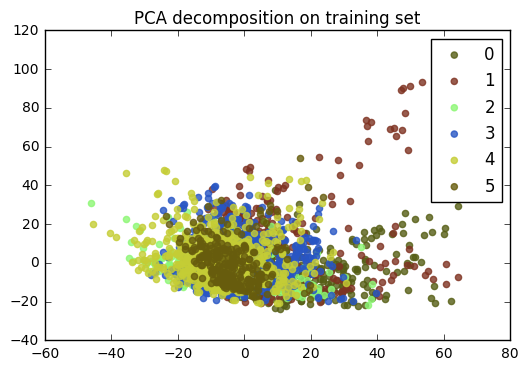

In [41]:
plt.figure()
for i in range(0,6):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], alpha=.8, color=np.random.rand(3,1),
                label=str(i))
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA decomposition on training set')
# plt.savefig("../doc/resource/pca_decomposition.png",dpi=200)
plt.show()